In [62]:
import pandas as pd
import geopandas as gpd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
usa = gpd.read_file('geo_export_29302501-c06c-43d7-8ef0-e3f008fccd63.shp')



In [64]:
def state_Plotter(states, us_map = True):
    

    fig, ax = plt.subplots(figsize=(30, 30))
 
    if us_map: #Executes if us_map is set to true.
        if 'HI' in states:
            usa[0:50].plot(ax=ax, alpha = 0.3)
            
        elif 'AK' in states:
            usa[1:51].plot(ax=ax,alpha = 0.3)
            
        elif 'AK' and 'HI' in states:
            usa[0:51].plot(ax = ax, alpha = 0.3)
            
        else:
            usa[1:50].plot(ax=ax, alpha = 0.3)
            
        for n in states:
            usa[usa.state_abbr == f'{n}'].plot(ax=ax, edgecolor = 'y', linewidth = 2)
            
    elif us_map == False:
        for n in states:
            usa[usa.state_abbr == f'{n}'].plot(ax=ax, edgecolor = 'y', linewidth = 2)

In [65]:
line = list()
with open('state_tornados.csv', mode ='r')as file:
   
  # reading the CSV file
  csvFile = csv.reader(file)
 
  # displaying the contents of the CSV file
  for lines in csvFile:
        line.append(lines)
        print(lines)
type(lines)        
line.sort()
print(line)

['AL ', ' 92']
['AK', ' 0']
['AZ', ' 6']
['AR', ' 24']
['CA', ' 5']
['CO', ' 48']
['CT', ' 4']
['DE', '2']
['FL', ' 27']
['GA', ' 43']
['HI', '0']
['ID', '0']
['IL', '67']
['IN', '18']
['IA', '53']
['KS', '44']
['KY', '14']
['LA', '41']
['ME', '0']
['MD', '11']
['MA', '7']
['MI', '17']
['MN', '27']
['MS', '87']
['MO', '21']
['MT', '1']
['NE', '23']
['NV', '3']
['NH', '0']
['NJ', '13']
['NM', '18']
['NY', '5']
['NC', '19']
['ND', '20']
['OH', '25']
['OK', '33']
['OR', '0']
['PA', '37']
['RI', '0']
['SC', '24']
['SD', '19']
['TN', '32']
['TX', '110']
['UT', '4']
['VT', '2']
['VA', '9']
['WA', '2']
['WV', '2']
['WI', '25']
['WY', '2']
['DC', '2']
[['AK', ' 0'], ['AL ', ' 92'], ['AR', ' 24'], ['AZ', ' 6'], ['CA', ' 5'], ['CO', ' 48'], ['CT', ' 4'], ['DC', '2'], ['DE', '2'], ['FL', ' 27'], ['GA', ' 43'], ['HI', '0'], ['IA', '53'], ['ID', '0'], ['IL', '67'], ['IN', '18'], ['KS', '44'], ['KY', '14'], ['LA', '41'], ['MA', '7'], ['MD', '11'], ['ME', '0'], ['MI', '17'], ['MN', '27'], ['MO', '21'

In [66]:
print(line[0][1])

torna = np.zeros(len(line))

for i in range(len(line)):
    t = line[i][1]
    torna[i] = t
usa.sort_values('state_abbr', ignore_index=True,inplace=True)

usa['Tornado'] = torna

 0


In [67]:
usa=usa.drop(usa.index[0])
usa.head()

,drawseq,state_abbr,state_fips,state_name,sub_region,geometry,Tornado
1,43.0,AL,01,Alabama,East South Central,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",92.0
2,47.0,AR,05,Arkansas,West South Central,"POLYGON ((-94.46169 34.19677, -94.45262 34.508...",24.0
3,37.0,AZ,04,Arizona,Mountain,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",6.0
4,25.0,CA,06,California,Pacific,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",5.0
5,32.0,CO,08,Colorado,Mountain,"POLYGON ((-102.04446 37.64147, -102.04201 37.3...",48.0


([], [])

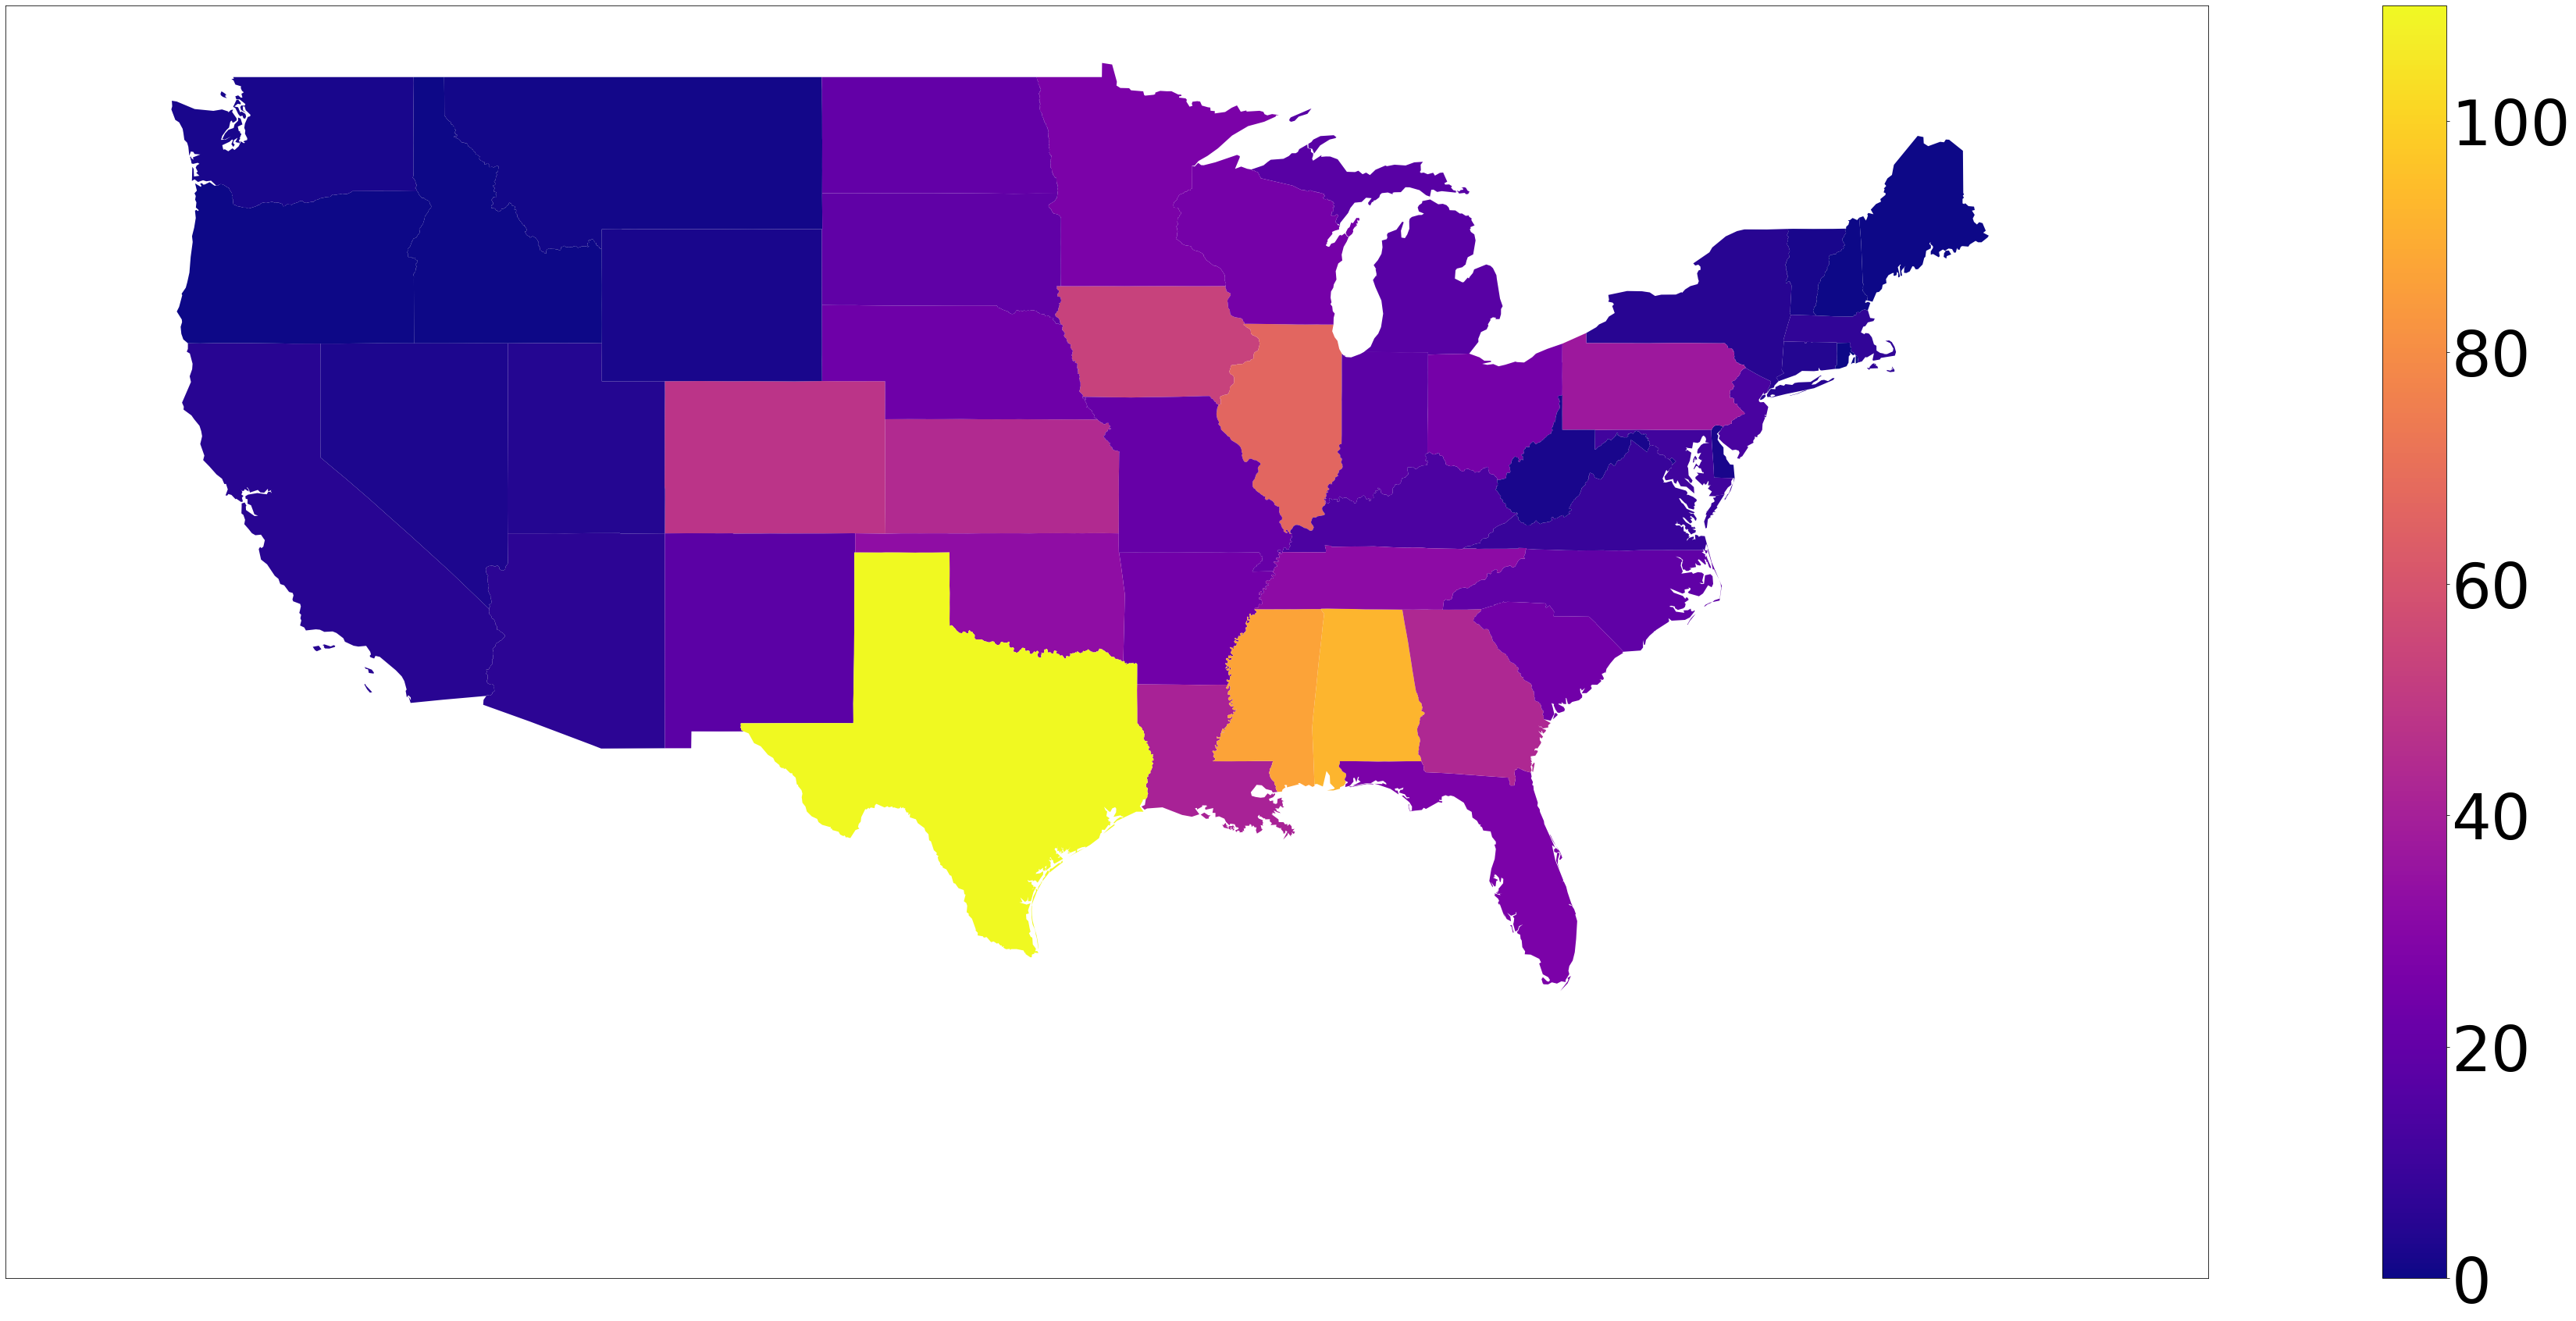

In [101]:
plt.rc('font', size=80) 
fig, ax = plt.subplots(figsize=(80, 30))
ax=usa.plot(column = "Tornado", ax=ax,figsize=(80, 30), cmap="plasma",legend = True)
ax.set_xlim(-130,-60)
plt.tick_params(left=False)
plt.xticks([])
plt.yticks([])
